# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods (Week 1)
## Requirements:

A description of the problem and a discussion of the background.<br>
A description of the data and how it will be used to solve the problem.<br>
For the second week, the final deliverables of the project will be:

A link to your Notebook on your Github repository, showing your code.<br>
A full report consisting of all of the following components:<br>
Introduction where you discuss the business problem and who would be interested in this project.<br>
Data where you describe the data that will be used to solve the problem and the source of the data.<br>
Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.<br>
Results section where you discuss the results.<br>
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.<br>
Conclusion section where you conclude the report.<br>
Your choice of a presentation or blogpost.<br>

## A description of the problem and a discussion of the background.

A decission has to be made in order to select the city to place a restaurant. Oakland, Emeryville, and San Diego have been selected for the search. Very good reasons have to be exposed in order to atract potential investors in the food business. The type of the restaurant, the city, and the location in the city, are key factors to get success in the business.

The scope of this project is to accurately predict the acceptance that a new restaurant can expect based on the type of cuisine and the location in the cities selected. linear and logistic regressions are used to find which method is better for the prediction.

## A description of the data and how it will be used to solve the problem.

Initial dataframe used is named 'raw_dataset', it has the information required to make the analysis.<br>

Foursquare is used to retrive city coordinates, and to obtain the URLs with the raw data in JSON. From each URL: 'name', 'categories', 'latitude', 'longitude', and'id' columns are taken for each city, so a city column is also included.<br>
Restaurants in a 1000km radius from the coordinates provided by the geolocator, will be analized. Cleaning is performed to remove noisy data, and getting only restaurant valid data provided by Foursquare. 'likes' data is important for decission making. Only valuable information is pulled in order to have a strong analysis.<br>
'id' column is used in order to pull the 'likes' and include the information in the dataframe. 

## Methodology section

Both linear and logistic regression are used to train and test the data.<br>
Linear regression is used to predict the number of 'likes' a new restaurant in this region will acquire. Sci-Kit Learn is used for this stage.<br>
Logistic regression is used as the classification method.<br>
Since, binning is used when classifying by number of 'likes', multinomial logistic regression is used to perform the analysis.<br>
Although the ranges are discrete categories, they can be considered ordinal in nature.<br>
The logistic regression is specified as being both multinomial and ordinal.

### Code

In [121]:
import pandas as pd 
import numpy as np 
import json
import requests
from pandas.io.json import json_normalize 
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium 
import matplotlib.pyplot as plt
import pylab as pl
import itertools
import warnings
from urllib.request import urlopen
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim 
from sklearn import linear_model
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, r2_score
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
print('All libraries have been imported')

All libraries have been imported


### Retrieving Foursquare City Coordinates:

In [122]:
address1 = 'Oakland, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location1 = geolocator.geocode(address1)
latitude1 = location1.latitude
longitude1 = location1.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address1, latitude1, longitude1))

address2 = 'Emeryville, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location2 = geolocator.geocode(address2)
latitude2 = location2.latitude
longitude2 = location2.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address2, latitude2, longitude2))

address3 = 'San Diego, California'

geolocator = Nominatim(user_agent="foursquare_agent")
location3 = geolocator.geocode(address3)
latitude3 = location3.latitude
longitude3 = location3.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address3, latitude3, longitude3))

The geograpical coordinate of Oakland, California are 37.8044557, -122.2713563.
The geograpical coordinate of Emeryville, California are 37.8314089, -122.2865266.
The geograpical coordinate of San Diego, California are 32.7174202, -117.1627728.


### Foursquare Credentials:

In [123]:
CLIENT_ID = 'R3JTQTGYXBW0HQCG5BYPSW3AAOLL3KOUTOUATGMPZSQ01LXB' 
CLIENT_SECRET = 'K1YBPNPGZ1NJIYKS2ILN41SHNVSK4SGGSL3IXCD0SUA4Y3SQ' 
VERSION = '20201212' 

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)


LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 1000 # define radius

# create URLs
url1 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude1, 
    longitude1, 
    radius, 
    LIMIT)


# create URLs
url2 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude2, 
    longitude2, 
    radius, 
    LIMIT)


# create URLs
url3 = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude3, 
    longitude3, 
    radius, 
    LIMIT)

print(url1, url2, url3)

Your credentails:
CLIENT_ID: R3JTQTGYXBW0HQCG5BYPSW3AAOLL3KOUTOUATGMPZSQ01LXB
CLIENT_SECRET:K1YBPNPGZ1NJIYKS2ILN41SHNVSK4SGGSL3IXCD0SUA4Y3SQ
https://api.foursquare.com/v2/venues/explore?&client_id=R3JTQTGYXBW0HQCG5BYPSW3AAOLL3KOUTOUATGMPZSQ01LXB&client_secret=K1YBPNPGZ1NJIYKS2ILN41SHNVSK4SGGSL3IXCD0SUA4Y3SQ&v=20201212&ll=37.8044557,-122.2713563&radius=1000&limit=100 https://api.foursquare.com/v2/venues/explore?&client_id=R3JTQTGYXBW0HQCG5BYPSW3AAOLL3KOUTOUATGMPZSQ01LXB&client_secret=K1YBPNPGZ1NJIYKS2ILN41SHNVSK4SGGSL3IXCD0SUA4Y3SQ&v=20201212&ll=37.8314089,-122.2865266&radius=1000&limit=100 https://api.foursquare.com/v2/venues/explore?&client_id=R3JTQTGYXBW0HQCG5BYPSW3AAOLL3KOUTOUATGMPZSQ01LXB&client_secret=K1YBPNPGZ1NJIYKS2ILN41SHNVSK4SGGSL3IXCD0SUA4Y3SQ&v=20201212&ll=32.7174202,-117.1627728&radius=1000&limit=100


### Data Exploration:

In [124]:
# scrape the data from the generated URLs

results1 = requests.get(url1).json()
results1

results2 = requests.get(url2).json()
results2

results3 = requests.get(url3).json()
results3

# function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    

# FIRST CITY   

venues1 = results1['response']['groups'][0]['items']
nearby_venues1 = pd.json_normalize(venues1) # flatten JSON

# filter columns
filtered_columns1 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues1 = nearby_venues1.loc[:, filtered_columns1]

# filter the category for each row
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)

# clean columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

# SECOND CITY

venues2 = results2['response']['groups'][0]['items']
nearby_venues2 = pd.json_normalize(venues2) # flatten JSON

# filter columns
filtered_columns2 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues2 = nearby_venues2.loc[:, filtered_columns2]

# filter the category for each row
nearby_venues2['venue.categories'] = nearby_venues2.apply(get_category_type, axis=1)

# clean columns
nearby_venues2.columns = [col.split(".")[-1] for col in nearby_venues2.columns]

# THIRD CITY

venues3 = results3['response']['groups'][0]['items']
nearby_venues3 = pd.json_normalize(venues3) # flatten JSON

# filter columns
filtered_columns3 = ['venue.name', 'venue.categories', 'venue.location.lat', 
                    'venue.location.lng', 'venue.id']
nearby_venues3 = nearby_venues3.loc[:, filtered_columns3]

# filter the category for each row
nearby_venues3['venue.categories'] = nearby_venues3.apply(get_category_type, axis=1)

# clean columns
nearby_venues3.columns = [col.split(".")[-1] for col in nearby_venues3.columns]
print('{} venues for Oakland, California were returned by Foursquare.'.format(nearby_venues1.shape[0]))
print()
print('{} venues for Emeryville, California were returned by Foursquare.'.format(nearby_venues2.shape[0]))
print()
print('{} venues for San Diego, California were returned by Foursquare.'.format(nearby_venues3.shape[0]))

100 venues for Oakland, California were returned by Foursquare.

100 venues for Emeryville, California were returned by Foursquare.

100 venues for San Diego, California were returned by Foursquare.


In [125]:
# add locations data to the data sets of each city

nearby_venues1['city'] = 'Oakland'
nearby_venues2['city'] = 'Emeryville'
nearby_venues3['city'] = 'San Diego'

# Venues location per City Maps 

## Oakland

In [158]:
# create map of Oakland using latitude and longitude values
map_oakland = folium.Map(location=[latitude1, longitude1], zoom_start=15)
# add markers to map
for lat, lng, categories, name in zip(nearby_venues1['lat'], nearby_venues1['lng'], nearby_venues1['categories'], nearby_venues1['name']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_oakland)  
map_oakland

## Emeryville

In [159]:
# create map of Emeryville using latitude and longitude values
map_emeryville = folium.Map(location=[latitude2, longitude2], zoom_start=15)
# add markers to map
for lat, lng, categories, name in zip(nearby_venues2['lat'], nearby_venues2['lng'], nearby_venues2['categories'], nearby_venues2['name']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_emeryville)  
map_emeryville

## San Diego

In [156]:
# create map of San Diego using latitude and longitude values
map_sandiego = folium.Map(location=[latitude3, longitude3], zoom_start=15)
# add markers to map
for lat, lng, categories, name in zip(nearby_venues3['lat'], nearby_venues3['lng'], nearby_venues3['categories'], nearby_venues3['name']):
    label = '{}, {}'.format(name, categories)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sandiego)  
map_sandiego

In [126]:
# combine the three cities into one data set

nearby_venues = nearby_venues1.copy()
nearby_venues = nearby_venues.append(nearby_venues2)
nearby_venues = nearby_venues.append(nearby_venues3)

In [127]:
nearby_venues

,name,categories,lat,lng,id,city
0,Oaklandish,Clothing Store,37.805075,-122.270726,4dfb9c2c1f6eeef806ab898c,Oakland
1,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland
2,Bar Shiru,Bar,37.806378,-122.270393,5c5b9abdf870fd002c35d291,Oakland
3,Cafe Van Kleef,Bar,37.806660,-122.270273,46884818f964a52056481fe3,Oakland
4,Cape & Cowl,Comic Shop,37.806725,-122.272747,56562410498ea43ab630819a,Oakland
5,Woods Bar & Brewery,Brewery,37.806889,-122.270415,5419f32c498e561ee5c2fa38,Oakland
6,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland
8,Lucky Duck Bicycle Cafe,Café,37.801684,-122.268656,57bf810c498ee0a34d9f8ca1,Oakland
9,Fox Theater,Music Venue,37.808136,-122.270670,4abc421df964a520ef8620e3,Oakland


In [128]:
nearby_venues['categories'].unique()

array(['Clothing Store', 'Vegetarian / Vegan Restaurant', 'Bar',
       'Comic Shop', 'Brewery', 'Bagel Shop', 'Japanese Restaurant',
       'Café', 'Music Venue', 'Tiki Bar', 'Sandwich Place', 'Yoga Studio',
       'Fried Chicken Joint', 'Vietnamese Restaurant', 'Coffee Shop',
       'Wine Bar', 'Mexican Restaurant', 'Seafood Restaurant',
       'Caribbean Restaurant', 'Skating Rink', 'Chinese Restaurant',
       'Nightclub', 'Cocktail Bar', 'Food Court', 'Beer Bar',
       'Hot Dog Joint', 'Cupcake Shop', 'Bubble Tea Shop', 'Taco Place',
       'Gym / Fitness Center', 'Brazilian Restaurant', 'Ice Cream Shop',
       'Dance Studio', 'Dessert Shop', 'Burger Joint', 'Climbing Gym',
       'American Restaurant', 'Indian Restaurant', 'Bakery',
       'Farmers Market', 'Gay Bar', 'Thai Restaurant',
       'Hotpot Restaurant', 'Tea Room', 'New American Restaurant',
       'Beer Garden', 'Dumpling Restaurant', 'Breakfast Spot',
       'Dim Sum Restaurant', 'Grocery Store', 'Arts & Crafts Sto

### Data Cleaning:

In [129]:
# check list and manually remove all non-restaurant data

nearby_venues['categories'].unique()

removal_list = ['Clothing Store','Bar','Brewery', 
                'Comic Shop', 'Yoga Studio','Café', 
                'Coffee Shop', 'Tiki Bar', 'Music Venue', 
                'Wine Bar',  'Cocktail Bar', 'Dance Studio', 
                'Gym / Fitness Center','Beer Bar', 
                'Bubble Tea Shop', 'Nightclub', 'Food Court', 
                'Ice Cream Shop', 'Cupcake Shop', 'Skating Rink', 
                'Dessert Shop', 'Climbing Gym', 'Bakery', 
                'Farmers Market', 'Gay Bar','Beer Garden',
                'Tea Room','Arts & Crafts Store', 'Grocery Store', 
                'Sports Bar', 'Museum', 'Street Food Gathering', 
                'Library', 'Skate Park', 'Movie Theater','Park', 
                'Gym', 'Stadium', 'Furniture / Home Store', 'Discount Store', 
                'Playground', 'Cosmetics Shop', 'Casino', 
                'Pet Store','Electronics Store', 'Snack Place',
                'Salon / Barbershop', 'Shopping Plaza', 'Deli / Bodega', 
                'Candy Store', 'Liquor Store', 'Hotel', 
                'Shoe Store', 'Bookstore', 'Shopping Mall', 
                'Dive Bar', 'Video Game Store', 'Pharmacy', 
                'Accessories Store', 'Lingerie Store', 'Mobile Phone Shop', 
                'Pool Hall', 'Juice Bar', 'Kids Store', 
                'Supplement Shop', 'Big Box Store', 'Mattress Store', 
                'Hardware Store', 'Paper / Office Supplies Store', 'Theater', 
                'Business Service', 'Donut Shop', 'Beer Store', 
                'Lounge', 'Health Food Store', 'Pedestrian Plaza', 
                'Hookah Bar', 'Concert Hall', 'Chocolate Shop', 
                'Hostel', 'Convenience Store', 'Pub', 
                'Plaza', 'Comedy Club', 'Speakeasy', 
                'Tattoo Parlor', 'Massage Studio']

nearby_venues = nearby_venues[~nearby_venues['categories'].isin(removal_list)]

nearby_venues['categories'].unique().tolist()

['Vegetarian / Vegan Restaurant',
 'Bagel Shop',
 'Japanese Restaurant',
 'Sandwich Place',
 'Fried Chicken Joint',
 'Vietnamese Restaurant',
 'Mexican Restaurant',
 'Seafood Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Hot Dog Joint',
 'Taco Place',
 'Brazilian Restaurant',
 'Burger Joint',
 'American Restaurant',
 'Indian Restaurant',
 'Thai Restaurant',
 'Hotpot Restaurant',
 'New American Restaurant',
 'Dumpling Restaurant',
 'Breakfast Spot',
 'Dim Sum Restaurant',
 'Southern / Soul Food Restaurant',
 'Diner',
 'Mediterranean Restaurant',
 'Scandinavian Restaurant',
 'Asian Restaurant',
 'Pizza Place',
 'Filipino Restaurant',
 'Wings Joint',
 'Burrito Place',
 'Fast Food Restaurant',
 'Sushi Restaurant',
 'Bus Stop',
 'French Restaurant',
 'Falafel Restaurant',
 'Theme Restaurant',
 'Italian Restaurant',
 'Turkish Restaurant',
 'Ramen Restaurant']

### DataFrame Creation:

In [130]:
# set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in list(nearby_venues.id):
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)


nearby_venues['likes'] = like_list
nearby_venues.head()

[77, 22, 156, 14, 9, 71, 33, 202, 65, 51, 104, 369, 61, 177, 93, 188, 39, 40, 39, 23, 43, 56, 24, 102, 13, 259, 11, 73, 239, 25, 36, 45, 69, 5, 43, 52, 230, 33, 120, 99, 247, 30, 332, 133, 35, 24, 31, 61, 13, 18, 56, 92, 16, 62, 68, 4, 65, 17, 17, 5, 1, 22, 41, 0, 3, 31, 15, 0, 156, 76, 9, 2, 78, 131, 171, 142, 26, 41, 105, 34, 94, 18, 24, 19, 35, 296, 31, 128, 21, 320, 104, 30, 31, 480, 540, 489, 174, 132, 185, 103, 54, 204]


,name,categories,lat,lng,id,city,likes
1,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77
6,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,156
11,Anula's Cafe,Sandwich Place,37.803583,-122.270151,4b50d22df964a520a73327e3,Oakland,14
13,World Famous Hotboys,Fried Chicken Joint,37.806526,-122.272040,5e0a805333617d00086cd498,Oakland,9


In [131]:
nearby_venues.count()

name          102
categories    102
lat           102
lng           102
id            102
city          102
likes         102
dtype: int64

In [132]:
# this is really the raw dataset now so let us rename it something more appropriate

raw_dataset = nearby_venues.copy(deep=True) 
raw_dataset.head()

,name,categories,lat,lng,id,city,likes
1,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77
6,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,156
11,Anula's Cafe,Sandwich Place,37.803583,-122.270151,4b50d22df964a520a73327e3,Oakland,14
13,World Famous Hotboys,Fried Chicken Joint,37.806526,-122.272040,5e0a805333617d00086cd498,Oakland,9


### Data Preparation for Machine Learning:

In [133]:
# inspecting the raw dataset shows that there may be too many different types of cuisines

raw_dataset['categories'].unique().tolist()

['Vegetarian / Vegan Restaurant',
 'Bagel Shop',
 'Japanese Restaurant',
 'Sandwich Place',
 'Fried Chicken Joint',
 'Vietnamese Restaurant',
 'Mexican Restaurant',
 'Seafood Restaurant',
 'Caribbean Restaurant',
 'Chinese Restaurant',
 'Hot Dog Joint',
 'Taco Place',
 'Brazilian Restaurant',
 'Burger Joint',
 'American Restaurant',
 'Indian Restaurant',
 'Thai Restaurant',
 'Hotpot Restaurant',
 'New American Restaurant',
 'Dumpling Restaurant',
 'Breakfast Spot',
 'Dim Sum Restaurant',
 'Southern / Soul Food Restaurant',
 'Diner',
 'Mediterranean Restaurant',
 'Scandinavian Restaurant',
 'Asian Restaurant',
 'Pizza Place',
 'Filipino Restaurant',
 'Wings Joint',
 'Burrito Place',
 'Fast Food Restaurant',
 'Sushi Restaurant',
 'Bus Stop',
 'French Restaurant',
 'Falafel Restaurant',
 'Theme Restaurant',
 'Italian Restaurant',
 'Turkish Restaurant',
 'Ramen Restaurant']

In [134]:
# we can group some cuisines together to make a better categorical variable

european = ['Mediterranean Restaurant', 'Scandinavian Restaurant', 'Pizza Place',
       'French Restaurant', 'Falafel Restaurant', 'Italian Restaurant',
       'Turkish Restaurant']

latin = ['Mexican Restaurant', 'Taco Place', 'Brazilian Restaurant', 
          'Burrito Place']

asian = ['Japanese Restaurant', 'Vietnamese Restaurant', 'Chinese Restaurant',
         'Hot Dog Joint', 'Hotpot Restaurant', 'Indian Restaurant',
         'Thai Restaurant', 'Dumpling Restaurant', 'Dim Sum Restaurant',
         'Asian Restaurant', 'Filipino Restaurant', 'Sushi Restaurant',
         'Ramen Restaurant']

american = ['Vegetarian / Vegan Restaurant', 'Seafood Restaurant', 'Caribbean Restaurant',
           'Burger Joint', 'American Restaurant', 'New American Restaurant',
            'Southern / Soul Food Restaurant', 'Diner']

casual = ['Bagel Shop', 'Sandwich Place', 'Fried Chicken Joint', 
          'Breakfast Spot', 'Wings Joint', 'Fast Food Restaurant',
          'Theme Restaurant']

def conditions(s):
    if s['categories'] in european:
        return 'european'
    if s['categories'] in latin:
        return 'latin'
    if s['categories'] in asian:
        return 'asian'
    if s['categories'] in american:
        return 'american'
    if s['categories'] in casual:
        return 'casual'

raw_dataset['categories_classified'] = raw_dataset.apply(conditions, axis=1)
raw_dataset

,name,categories,lat,lng,id,city,likes,categories_classified
1,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77,american
6,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22,casual
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,156,asian
11,Anula's Cafe,Sandwich Place,37.803583,-122.270151,4b50d22df964a520a73327e3,Oakland,14,casual
13,World Famous Hotboys,Fried Chicken Joint,37.806526,-122.272040,5e0a805333617d00086cd498,Oakland,9,casual
14,Tay Ho Restaurant & Bar,Vietnamese Restaurant,37.802062,-122.269573,4c8b16ec52a98cfad73533e9,Oakland,71,asian
17,Nature Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.802157,-122.270983,4f52deb2e4b0ac6d0c91df05,Oakland,33,american
18,Cosecha,Mexican Restaurant,37.801607,-122.274889,4e179c7752b123a586cef176,Oakland,202,latin
19,The Cook And Her Farmer,Seafood Restaurant,37.801583,-122.274860,5376a879498e8eeb2402cd71,Oakland,65,american
20,Binh Minh Quan,Vietnamese Restaurant,37.802020,-122.269396,4a75022cf964a52043e01fe3,Oakland,51,asian


In [135]:
# double check to make sure categories_classified has been created correctly

pd.crosstab(index = raw_dataset["categories_classified"],
            columns="count")

col_0,count
categories_classified,
american,21
asian,26
casual,18
european,17
latin,19


In [136]:
raw_dataset['likes'].mean()

91.49019607843137

In [137]:
# create a function to bin for us

def rankings(df):
    
    if df['likes'] <= 60:
        return 3
    
    elif df['likes'] <= 100:
        return 2
    
    elif df['likes'] > 100:
        return 1

In [138]:
# apply rankings function to dataset

raw_dataset['ranking'] = raw_dataset.apply(rankings, axis=1)
raw_dataset

,name,categories,lat,lng,id,city,likes,categories_classified,ranking
1,Golden Lotus Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.803290,-122.270473,49cebb1bf964a520785a1fe3,Oakland,77,american,2
6,Beauty’s Bagel Shop,Bagel Shop,37.806082,-122.268356,5bd0959cf1fdaf002ce03e11,Oakland,22,casual,3
7,Abura-Ya,Japanese Restaurant,37.805959,-122.267693,539a69a7498ee67090b2b285,Oakland,156,asian,1
11,Anula's Cafe,Sandwich Place,37.803583,-122.270151,4b50d22df964a520a73327e3,Oakland,14,casual,3
13,World Famous Hotboys,Fried Chicken Joint,37.806526,-122.272040,5e0a805333617d00086cd498,Oakland,9,casual,3
14,Tay Ho Restaurant & Bar,Vietnamese Restaurant,37.802062,-122.269573,4c8b16ec52a98cfad73533e9,Oakland,71,asian,2
17,Nature Vegetarian Restaurant,Vegetarian / Vegan Restaurant,37.802157,-122.270983,4f52deb2e4b0ac6d0c91df05,Oakland,33,american,3
18,Cosecha,Mexican Restaurant,37.801607,-122.274889,4e179c7752b123a586cef176,Oakland,202,latin,1
19,The Cook And Her Farmer,Seafood Restaurant,37.801583,-122.274860,5376a879498e8eeb2402cd71,Oakland,65,american,2
20,Binh Minh Quan,Vietnamese Restaurant,37.802020,-122.269396,4a75022cf964a52043e01fe3,Oakland,51,asian,3


### Machine Learning | Linear Regression:

In [139]:
# create dummies for linear regression modelling

# one hot encoding
reg_dataset = pd.get_dummies(raw_dataset[['categories_classified', 
                                          'city',]], 
                               prefix="", 
                               prefix_sep="")

# add name, ranking, and likes columns back to dataframe
reg_dataset['ranking'] = raw_dataset['ranking']
reg_dataset['likes'] = raw_dataset['likes']
reg_dataset['name'] = raw_dataset['name']

# move name column to the first column
reg_columns = [reg_dataset.columns[-1]] + list(reg_dataset.columns[:-1])
reg_dataset = reg_dataset[reg_columns]


reg_dataset.head()

,name,american,asian,casual,european,latin,Emeryville,Oakland,San Diego,ranking,likes
1,Golden Lotus Vegetarian Restaurant,1,0,0,0,0,0,1,0,2,77
6,Beauty’s Bagel Shop,0,0,1,0,0,0,1,0,3,22
7,Abura-Ya,0,1,0,0,0,0,1,0,1,156
11,Anula's Cafe,0,0,1,0,0,0,1,0,3,14
13,World Famous Hotboys,0,0,1,0,0,0,1,0,3,9


In [140]:
df = raw_dataset.copy(deep=True) 

In [141]:
df1 = pd.pivot_table(df, values='likes', index=['categories_classified'],
                    columns=['city'], aggfunc=np.sum)

In [142]:
df1.head()

city,Emeryville,Oakland,San Diego
categories_classified,,,
american,480.0,994.0,1519.0
asian,59.0,1488.0,393.0
casual,86.0,444.0,669.0
european,401.0,NaN,610.0
latin,136.0,761.0,1292.0


<AxesSubplot:xlabel='categories_classified'>

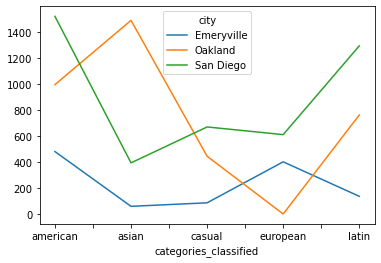

In [143]:
df1=df1.fillna(0)
df1.plot()

American type cuisine is the one with the highest lkes in San Diego and Oakland.

In [144]:
# Multiple Linear Regression

msk = np.random.rand(len(reg_dataset)) < 0.8
train = reg_dataset[msk]
test = reg_dataset[~msk]

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y = np.asanyarray(train[['likes']])
regr.fit (x, y)

# The coefficients

print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 92.45633267  24.04898766  36.991111     7.98159056  65.93699114
   -6.20597668 -37.46688567  43.67286235]]


In [145]:
# Multiple Linear Regression Prediction Capabilities

y_hat= regr.predict(test[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

x = np.asanyarray(test[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y = np.asanyarray(test[['likes']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 17494.31
Variance score: 0.09


### Machine Learning | Logistic Regression:

In [146]:
# Multinomial Ordinal Logistic Regression

x_train = np.asanyarray(train[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y_train = np.asanyarray(train['ranking'])

x_test = np.asanyarray(test[['american', 'asian', 'casual',
                         'european', 'latin', 'Oakland', 
                         'Emeryville', 'San Diego']])

y_test = np.asanyarray(test['ranking'])


mul_ordinal = linear_model.LogisticRegression(multi_class='multinomial',
                                              solver='newton-cg',
                                              fit_intercept=True).fit(x_train,
                                                                      y_train)

mul_ordinal

coef = mul_ordinal.coef_[0]
print (coef)

[ 0.64883191 -0.17076667 -0.23266156 -0.13916217 -0.03679953  0.08804952
 -0.84954469  0.76149495]


In [147]:
# Multinomial Ordinal Logistic Regression Prediction Capabilities

yhat = mul_ordinal.predict(x_test)
yhat

yhat_prob = mul_ordinal.predict_proba(x_test)
yhat_prob


# average = None, average = 'micro', average = 'macro', or average = 'weighted'
jaccard_score(y_test, yhat, average='weighted')

0.27070707070707073

In [148]:
log_loss(y_test, yhat_prob)

0.9799229059020281

In [149]:
# Exploration of Coefficient Magnitudes of Full Dataset

x_all = np.asanyarray(reg_dataset[['american', 'asian', 'casual',
                                   'european', 'latin', 'Oakland', 
                                   'Emeryville', 'San Diego']])

y_all = np.asanyarray(reg_dataset['ranking'])



LR = linear_model.LogisticRegression(multi_class='multinomial',
                                            solver='newton-cg',
                                            fit_intercept=True).fit(x_all,
                                                                    y_all)

LR

coef = LR.coef_[0]
print(coef)

[ 0.44665774 -0.20762377 -0.19235879 -0.03626791  0.0821337   0.06140855
 -0.74041853  0.67901042]


In [150]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.33      0.29      0.31         7
           2       0.00      0.00      0.00         2
           3       0.50      0.67      0.57         9

    accuracy                           0.44        18
   macro avg       0.28      0.32      0.29        18
weighted avg       0.38      0.44      0.41        18



## Results:

A linear regression model was trained on a random subsample of 80% and then the other 20% was used for testing purposes. In order to evaluate if the model is reasonable, the residual sum of squares and variance score were both calculated (14347.49, 0.09). The variance score is quite low, which means that is not a good way of modeling ther data. So logistic regression was selected for the analysis. 

The multinomial ordinal logistic regression model was also trained on a random subsample of 80% and then tested on the remaining 20%. The jaccard score and log-loss were both calculated (35.61% and 0.946 respectively). A jaccard score of 35.6% is quite reasonable. The classification report is included in the analysis. 

Given the modestly accurate ability of this mode, we have the ability to run the model on the complete dataset. The coefficients show that opening a restaurant in San Diego (0.679), or serving Americcan cuisine are positively associated with 'likes'.

## Discussion:

The first thing to note is that given the data, logistic regression presents a better fit for the data over linear regression. Using logistic regression we were able to obtain a Jaccard Score of 35.6%, which although not perfect, is more reasonable than the low variance score obtained from the linear regression (0.09). As stated before, please note that for the purposes of this project, we are assumming that likes are a good proxy for how well a new restaurant will do in terms of brand, image and by extension how well the restaurant will perform business-wise. Whether or not these assumptions hold up in a real-life scenario is up for discussion, but this project does contain limitations in scope due to the amount of data that can be fetched from the FourSquare API.

As such, to obtain insights into this data, we can proceed with breaking down the results of the logistic regression model. The results showed that the precision score for classifying whether the new restaurant would fall into classes 1, 2, or 3 (highest, medium, lowest) were 100%, 0%, and 55%. Therefore, the model is better at predicting if a restaurant will fall into the best or worst percentile of likes. This is good as we are mostly concerned with whether the restuarant will perform well or not so the high accuracy of predictions for the two extremum is a welcome feature. This allows us to fairly accurately predict the general performance of the business opportunity. Different binning methods for the classes were attempted, but the use of 3 bins by far yielded the best Jaccard Score.

Additionally, not only are we attempting to predict the general business performance but also pull insights to inform on business strategy. In this case strategy insight can be gleamed from the coefficient values from running the logistic regression on the full dataset. As such, we can see that opening a restaurant in Emeryville, or serving cuisine that is asian or casual in nature, are associated negatively with "likes." This suggests that the business opportunity should be opening a restaurant in either Oakland or San Diego, with a cuisine that is Latin or American in nature would be the best approach for maximizing likes.

## Conclusion:

In conclusion, after analyzing restaurant 'likes' in California from the 300 restaurants, it can be concluded that the approach to best take when looking to maximize business performance (as measured by 'likes') is to open a restaurant that is either Latin, or American and that opening the venue in either Oakland or San Diego rather than Emeryville would be the best approach. Additionally, the predictive capabilities of the logistic regression prediction model proved to be the most accurate for classifying whether a restaurant fell in either the best or worst classes when the data was binned into their 3 respective classes.